Import the data file ‘data.csv’

In [52]:
import csv
import math
import matplotlib.pyplot as plt

dataset = []
with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        dataset.append(float(row[0]))

Write a class with name “BasicStatistics”. The constructor of this class must take the dataset as argument.

The BasicStatistics class must have the following functions:
- mean
- median (use the sort function, consider odd and even #samples)
- variance
- standard deviation
- normalize the data set w.r.t. zero-mean and unit variance.
- plot

Plot should create a figure with three subplots (using subplot in python).
- one with a histogram of the data set (choose a reasonable number of bins). Plot the 
  - median
  - mean
  - standard deviation as vertices. 
- Original Data set 
- Standardized data set. 



In [53]:
class BasicStatistics:
  def __init__(self, dataset):
      self.dataset = dataset
  
  def mean(self):
    return sum(self.dataset)/len(self.dataset)

  def median(self):
    sorted_dataset = sorted(self.dataset)
    if(len(sorted_dataset)%2):
      mid = (len(sorted_dataset)-1)//2
      return sorted_dataset[mid]
    else:
      mid = len(sorted_dataset)//2
      return (sorted_dataset[mid]+sorted_dataset[mid-1])/2

  def variance(self):
    sum_square_dev = []
    mean = self.mean()
    for i in range(len(self.dataset)):
      sum_square_dev.append(pow(self.dataset[i]-mean, 2))
    return sum(sum_square_dev)/(len(self.dataset)-1)

  def standard_deviation(self):
    return math.sqrt(self.variance())

  def standardize(self):
    standardize = []
    for i in range(len(self.dataset)):
      standardize.append((self.dataset[i]-self.mean())/self.standard_deviation())
    return standardize

  def plot(self):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
    # histogram plot
    ax1.hist(self.dataset, bins=20, color='b', label='Histogram')
    ax1.axvline(self.mean(), color='r', linestyle='dashed', linewidth=2)
    ax1.axvline(self.median(), color='y', linestyle='dashed', linewidth=2)
    ax1.axvline(self.mean()+self.standard_deviation(), color='green', linestyle='dashed', linewidth=2)
    ax1.axvline(self.mean()-self.standard_deviation(), color='green', linestyle='dashed', linewidth=2)
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Data Distribution')
    ax1.legend(['Histogram', 'Mean', 'Median', 'Standard deviation'])
    # original data set plot
    ax2.plot(self.dataset, '.', color='blue')
    ax2.axhline(self.mean(), color='r', linestyle='dashed', linewidth=2)
    ax2.axhline(self.mean()+self.standard_deviation(), color='green', linestyle='dashed', linewidth=2)     
    ax2.axhline(self.mean()-self.standard_deviation(), color='green', linestyle='dashed', linewidth=2)     
    ax2.set_xlabel('Sample')
    ax2.set_ylabel('Values')
    ax2.set_title('Raw Data')
    ax2.legend(['Data', 'Mean', 'Standard deviation'])
    # standardized data set plot
    standardized_dataset = self.standardize()
    ax3.plot(standardized_dataset, '.', color='blue')
    ax3.axhline(0, color='red', linestyle='dashed', linewidth=1)
    ax3.axhline(1, color='green', linestyle='dashed', linewidth=1)
    ax3.axhline(-1, color='green', linestyle='dashed', linewidth=1)
    ax3.set_xlabel('Sample')
    ax3.set_ylabel('Standardized Values')
    ax3.set_title('Standardized Data')
    ax3.legend(['Data', 'Mean', 'Standard deviation'])

    plt.tight_layout()
    plt.show()

Demonstrate their use.

Mean: 4.082260849783784
Median: 4.134365892504183
Variance: 4.150059943181902
Standard Deviation: 2.037169591168566
Standardized Data: [-0.6838447880414142, -0.7348435492358893, 0.1943711156945281, -0.7999098369772997, 0.6062352984190515, -1.001232654183932, -0.41708833104491716, -0.5947263274913099, 0.4799193627753379, -1.6800325503612723, -0.4294760199974439, 0.4950028521191975, -0.25639393683721395, 0.30464170872555413, 0.4859089753361508, -1.3068258962483752, -0.018312585196509377, -0.30358513687500116, -0.701068249604771, -0.4369188362332916, 0.08517316059249593, 0.903634443911041, 2.8877381972171174, 0.8972660934640256, 0.5524859863718019, 0.646785569125067, -0.32519265852085577, -1.2525093073442475, -1.1215911877202203, -0.23249128352622112, 0.17401527962652463, 1.790813100171396, -1.3871007339757715, 0.3195154189499474, -0.676869023986834, -0.18267683125860898, -0.26378702024220885, -0.3049326194017662, 2.4611001145599998, 0.716445120296769, -0.7880786331216313, 1.3178132662107

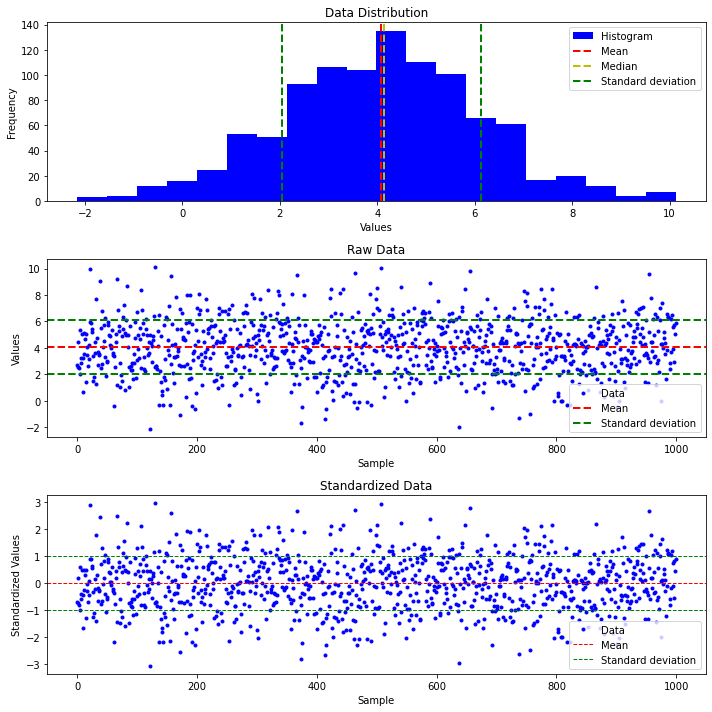

In [54]:
bs = BasicStatistics(dataset)
print('Mean:', bs.mean())
print('Median:', bs.median())
print('Variance:', bs.variance())
print('Standard Deviation:', bs.standard_deviation())
print('Standardized Data:', bs.standardize())
bs.plot()